In [47]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt
from fastmri.data import transforms
import torch

In [36]:
file_name = '/mnt/5T3/Greg/4Greg/margot_f2.h5'
hf = h5py.File(file_name)

In [37]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: [&#39;input&#39;, &#39;target&#39;]
Attrs: {}


In [38]:
image_input = hf['input'][()]
image_target = hf['target'][()]

# Check shape
print(image_input.shape)
print(image_target.shape)



(240, 4, 266, 320)
(240, 4, 266, 320)


In [48]:
def show_echos_for_slice(data, slice_num, echos,cmap=None):
    fig = plt.figure(figsize=(15,15))
    for i, echo in enumerate(echos):
        plt.subplot(1, len(echos), i+1)
        plt.imshow(data[slice_num,echo,:, :],norm=[-1,1], cmap='gray')

In [51]:
# Crop size to change:
# (244, 4, 266, 320)
crop_size = [225, 225]
image_input = transforms.center_crop(image_input, crop_size)
image_target = transforms.center_crop(image_target, crop_size)

In [50]:
show_echos_for_slice(image_input, 60, [0,1,2,3])

TypeError: &#39;norm&#39; must be an instance of matplotlib.colors.Normalize or None, not a list

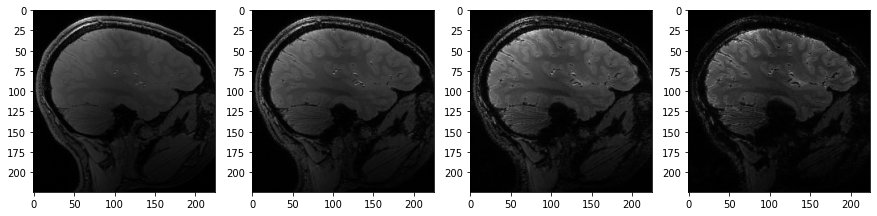

In [43]:
show_echos_for_slice(image_target, 60, [0,1,2,3])

In [44]:
image, mean, std = transforms.normalize_instance(image_input, eps=1e-11)

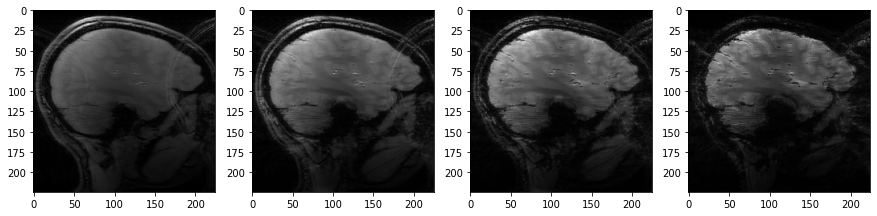

In [45]:
show_echos_for_slice(image, 60, [0,1,2,3])

In [34]:
std

7.275939134307528e-08

TypeError: zeros(): argument &#39;size&#39; (position 1) must be tuple of ints, not numpy.ndarray